# Data science for materials: Mini project supervised learning

The purpose of this mini project is to use supervised machine learning methods for materials science related topics.

### Mini projects and reports

This is the first of a total of four mini projects that will be offered. For passing the course you need to ** submit three mini project reports by 10. August**, which will then be evaluated. 

Each report should be around 1500 words and contain a brief introduction to methods and data, a results and discussion section and a summary and conclusion section.

### Description of mini project on supervised learning

You will build a supervised ML model(s) for the prediction of the solidus temperature in nickel-based superalloys. The required workflow is outlined in this notebook and comprises the following steps:

1. Load data (from HDF5 file)
2. Clean data (remove outliers, c.f. hands-on 2)
3. Preprocess data: rescale the temperature using standard scaler or min-max scaler
4. Choose a model validation strategy: 
 - train/test split or cross-validation
5. Choose a quality metric or several metrics and use it for all models you build:
 - $R^2$ coefficient
 - mean squared error (MSE)
 - root mean squared error (RMSE)
 - mean absolute error (MAE)
 - etc.
6. Use the following methods for supervised ML:
 - linear regression
 - single decision tree
 - random forest
 - gradient boosting
 - neural network (from **sklearn** package)
 - optional: more complex neural network libraries, like **tensorflow** or **keras**
7. Analyse feature importance (or coefficients in linear regression) where possible.
8. Analyse model transferability/interpretability analysis (Fix input variable to some mean/median/arbitrary reasonable value, vary one of the variable in its domain range, calculate the ML model prediction and plot it. See example and code snippets below.)

 As all supervised ML methods except linear regression have hyperparameters, include an optimization of the hyperparameters (hyperoptimization) either by hand or using automatic grid search (http://scikit-learn.org/stable/modules/grid_search.html) in order to reach the best model quality metrics.

### The project report sould reflect the abovementioned steps and contain:
 - a short overview of the data: its origin, description, size before and after cleaning (number of rows and columns)
 - description and reasoning behind model validation strategy
 - chosen model quality metrics
 - an overview table for each model from p.6, where you should specify train/test or cross-validation errors and highlight the top few features, if applicable. POssibly include a plot of true values vs. model prediction
 - plots to support model interpretation

# Follow this notebook and insert your solutions below

Importing standard set of packages

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import seaborn as sns

# Reading the data

Our original data is in file: Ni-superalloys-data_mod.hdf5

In [4]:
df = pd.read_hdf("Ni-superalloys-data_mod.hdf5")

explore file and file size

In [5]:
df.head()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,...,Mo_var,Ru_var,Ta_var,W_var,Re_var,T,P_TCAPI_GammaPrimePhaseFractionMain_value,P_TCAPI_SolidusTemperatureMain_value,P_TCAPI_LiquidusTemperatureMain_value,P_TCAPI_Density_CaronMain_value
0,0.030004,0.034982,0.060390,0.179354,0.004069,0.070098,0.033860,0.018508,0.070210,0.002396,...,0.000191,0.001678,0.004871,0.004565,0.004747,1274.450089,30.776242,1329.063527,1390.850579,8687.461852
1,0.030007,0.033043,0.049549,0.152138,0.045881,0.041942,0.024419,0.063190,0.013271,0.003000,...,0.001000,0.002000,0.002000,0.002000,0.001000,1188.879240,38.051605,1331.448294,1378.137130,8616.105462
2,0.030010,0.025279,0.042238,0.048914,0.086289,0.023597,0.064696,0.023875,0.052492,0.001978,...,0.001181,0.002562,0.003372,0.004824,0.003075,1231.177894,38.014655,1330.248589,1377.186752,8915.481419
3,0.030010,0.028758,0.117597,0.129213,0.013396,0.081975,0.043861,0.105330,0.004558,0.002228,...,0.001827,0.002841,0.002321,0.003077,0.002766,1295.155371,34.460291,1257.819936,1338.662203,8873.510816
4,0.030011,0.055962,0.022606,0.096740,0.089257,0.016347,0.025636,0.030560,0.041867,0.002470,...,0.002601,0.001075,0.003116,0.001902,0.003975,1375.811214,35.945177,1295.418620,1349.375554,8611.575596


In [6]:
df.shape

(57626, 23)

# Clean data

Remove data outside of inter-quartile range. Use built-in to dataframe function .quantile at two values 0.25 and 0.75 which corresponds to Q1 and Q3. 25%-quantile, for example, means 25% of the data is below the quantile value.

In [7]:
quantile_df = df.quantile(q=[0.25,0.75]).T
quantile_df.columns=["Q1","Q3"]
quantile_df

,Q1,Q3
Al,0.039625,0.055705
Ti,0.010876,0.031799
Cr,0.025157,0.075760
Co,0.058565,0.154196
Mo,0.014302,0.052548
Ru,0.006320,0.042088
Ta,0.021653,0.068051
W,0.017479,0.063436
Re,0.017998,0.064901
Al_var,0.000856,0.002238


Calculate inter quantile range

In [8]:
quantile_df["IQR"] = quantile_df["Q3"]-quantile_df["Q1"]

In [9]:
quantile_df["Lower_bound"] = quantile_df["Q1"]-1.5*quantile_df["IQR"]
quantile_df["Upper_bound"] = quantile_df["Q3"]+1.5*quantile_df["IQR"]

In [10]:
quantile_df

,Q1,Q3,IQR,Lower_bound,Upper_bound
Al,0.039625,0.055705,0.016080,0.015505,0.079826
Ti,0.010876,0.031799,0.020923,-0.020508,0.063183
Cr,0.025157,0.075760,0.050603,-0.050747,0.151664
Co,0.058565,0.154196,0.095631,-0.084881,0.297642
Mo,0.014302,0.052548,0.038246,-0.043068,0.109918
Ru,0.006320,0.042088,0.035768,-0.047331,0.095740
Ta,0.021653,0.068051,0.046397,-0.047942,0.137647
W,0.017479,0.063436,0.045957,-0.051457,0.132372
Re,0.017998,0.064901,0.046903,-0.052356,0.135254
Al_var,0.000856,0.002238,0.001382,-0.001217,0.004311


next iterate over the columns of the original dataframe and set those values that are outside the [Q1-1.5IQR,Q3+1.5IQR] range to Not-A-Number (NaN)

In [1]:
## INSERT YOUR CODE HERE

# Data scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = df[['Al', 'Ti', 'Cr', 'Co', 'Mo', 'Ru', 'Ta', 'W', 'Re', 'Al_var', 'Ti_var',
       'Cr_var', 'Co_var', 'Mo_var', 'Ru_var', 'Ta_var', 'W_var', 'Re_var', 'T']]

In [14]:
y = df["P_TCAPI_SolidusTemperatureMain_value"]

In [22]:
standard_scaler = StandardScaler()

 The concentration of elements is naturally between 0 and 1, therefore only temperature should be rescaled

In [23]:
X_scaled=X.copy()

In [24]:
X_scaled["T"]=standard_scaler.fit_transform(X[["T"]])

## Model validation strategy

Train-test splitting. Make sense when you have enough data, usually more than 10k (10000) samples. 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = ##YOUR CODE HERE

/home/users/lysogy36/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# Quality metrics

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Building the models

Define a helper method for scoring

In [41]:
def my_scorer(regressor):
    """
    Score a given regressor on both train and test datasets,
    calculate metrics (RMSE, MAE, R2)
    and plot true-vs-predicted values.
    
    Parameters:
    -----------
    regressor - a sklearn-compatible regressor that has .predict method
    
    """
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    print("Train data:")
    print("RMSE = ",np.sqrt(mean_squared_error(y_train,pred_train)))
    print("MAE = ",mean_absolute_error(y_train,pred_train))
    print("R2 = ",r2_score(y_train,pred_train))
    
    print("Test data:")
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,pred_test)))
    print("MAE = ",mean_absolute_error(y_test,pred_test))
    print("R2 = ",r2_score(y_test,pred_test))
    
    plt.scatter(y_train,pred_train,label="train",color="blue", alpha=0.1)
    plt.scatter(y_test,pred_test,label="test",color="green", alpha=0.1)
    min_val = min(min(y_train),min(y_test))
    max_val = max(max(y_train),max(y_test))
    plt.plot([min_val,max_val],[min_val,max_val])
    plt.show()

In [42]:
def train_test_r2_metrics(regressor):
    """
    Score a given regressor on both train and test datasets and
    calculate R2 metrics.
    

    Parameters:
    -----------
      regressor - a sklearn-compatible regressor that has .predict method
      
    Returns:
    --------
        r2_train, r2_test
    """
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)    
    r2_train=r2_score(y_train,pred_train)
    r2_test = r2_score(y_test,pred_test)    
    return r2_train,r2_test

## Linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We will write a helper function that will take a sklearn regressor and score it

Train data:
RMSE =  8.304971948587154
MAE =  6.272345884681204
R2 =  0.9614146670489145
Test data:
RMSE =  8.313461825534866
MAE =  6.262137632666303
R2 =  0.9613136439349195


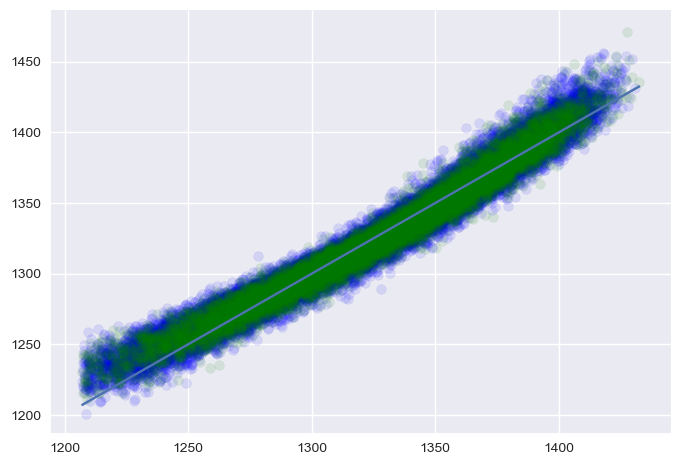

In [43]:
my_scorer(lr)

Linear model looks like:

$y = c_1 * x_1 + c_2 * x_2 + ... + c_n * x_n + b$

Coefficients $c_1, c_2, ..., c_n$ are

In [44]:
lr.coef_

array([-1.69411356e+03, -1.91165202e+03, -7.83543336e+02, -2.98668783e+02,
       -7.29766063e+02, -4.21213818e+02, -1.07637596e+03, -3.35784307e+02,
       -1.25560290e+02, -1.40896802e+01,  3.09581086e+01,  1.26728945e+02,
        1.19486316e+01,  1.30131762e-01,  8.04112953e+01, -3.93255603e+01,
        4.16181941e+01, -1.83501657e+01, -1.86801946e-01])

and bias term $b$ is 

In [45]:
lr.intercept_

1628.1640742336522

Combine coefficients and variables name together in dataframe and sort it by coefficient values.

This can give an idea of the **feature importance**. We are able to compare the coefficients because the variables were reduced to a similar scale.

In [46]:
pd.DataFrame({"label":X_scaled.columns, "coeff":lr.coef_}).sort_values("coeff",ascending = False)

,coeff,label
11,126.728945,Cr_var
14,80.411295,Ru_var
16,41.618194,W_var
10,30.958109,Ti_var
12,11.948632,Co_var
13,0.130132,Mo_var
18,-0.186802,T
9,-14.089680,Al_var
17,-18.350166,Re_var
15,-39.325560,Ta_var


## Decision tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [2]:
# YOUR CODE HERE

## Ensemble methods: random forest

Ensemble methods combine the prediciton of several **weak learners** (i.e. decision trees with small max_depth) 

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [2]:
# YOUR CODE HERE

# Gradient boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# YOUR CODE HERE

# Neural network

In [64]:
from sklearn.neural_network import MLPRegressor

In [2]:
# YOUR CODE HERE

# Transferability analysis

For a basic transferability analysis plot model predictions as a function of one variable while the rest of variables are fixed.

Take mean value over all input variables

In [180]:
X_train.mean()

Al        0.048014
Ti        0.022493
Cr        0.050807
Co        0.105253
Mo        0.035011
Ru        0.026068
Ta        0.045693
W         0.042101
Re        0.043364
Al_var    0.001537
Ti_var    0.001541
Cr_var    0.001534
Co_var    0.001981
Mo_var    0.001984
Ru_var    0.001695
Ta_var    0.002461
W_var     0.002445
Re_var    0.002438
T         0.003497
dtype: float64

Convert to numpy array

In [132]:
mean_val = X_train.mean().values
mean_val

Create an input array with all mean values (by creating an array of ones with corresponding shape and multiplying it by the mean values)

In [207]:
n_points = 50

In [208]:
x_transf=np.ones((n_points,X_train.shape[1]))

In [209]:
x_transf*=mean_val

Put your models and corresponding names into a list

In [ ]:
#ml_models = [lr, tree_regressor, random_forest, gbr, mlp]
ml_models = #YOUR CODE HERE

In [ ]:
#ml_models_names = ["LinReg","Decision Tree","Random Forest","Gradieng Boosting","NN"]
ml_models_names = # YOUR CODE HERE

Vary concentration from 0.9 min to 1.1 max

In [ ]:
ymin=y_train.min()
ymax=y_train.max()

In [ ]:
# iterate over each column in input data
for col_ind in range(len(X_train.columns)):
    col_name = X_train.columns[col_ind]
    print(col_name)
    # calculate min and max value for given column
    xmin= X_train.iloc[:,col_ind].min()
    xmax=X_train.iloc[:,col_ind].max()
    # sample a slightly wider region - from 0.9*xmin to 1.1*xmax
    transf_val=np.linspace(xmin*0.9,
                           xmax*1.1,
                           n_points)    
    #Create an input array of corresponding form filled with ones
    x_transf=np.ones((n_points,X_train.shape[1]))
    # multiplying it by the mean values
    x_transf*=mean_val
    # replace column under consideration with sampled values from 0.9*xmin to 1.1*xmax
    x_transf[:,col_ind] = transf_val    
    
    #loop over ML models and corresponding names
    for reg,name in zip(ml_models,ml_models_names):
        # make a vector of predictions
        y_transf = reg.predict(x_transf)
        # plot it as a function of sampled values for considered column
        plt.plot(transf_val, y_transf, label=name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel("Solidus T, K")
    # shade a domain of X and Y variables, for which data were presented in train set
    plt.fill_betweenx([ymin,ymax],[xmin,xmin],[xmax,xmax],alpha=0.1)
    plt.show()